In [1]:
import sympy as sm
sm.init_printing(use_latex='mathjax')
x = sm.Function('x')
t, x0= sm.symbols('t x0')
lhs = sm.Derivative(x(t), t, 2) + x(t).diff(t) + x(t) # Define left-hand side
result = sm.dsolve(lhs, ics={x(t).diff(t).subs(t,0): -x0/2, x(t).subs(t, 0): x0})
result = result.simplify() #This is fine, but we can simplify it further
print(sm.checkodesol(lhs, result))
result

(True, 0)


           -t           
           ───          
            2     ⎛√3⋅t⎞
x(t) = x₀⋅ℯ   ⋅cos⎜────⎟
                  ⎝ 2  ⎠

**Solving ODEs with SciPy solve_ivp**

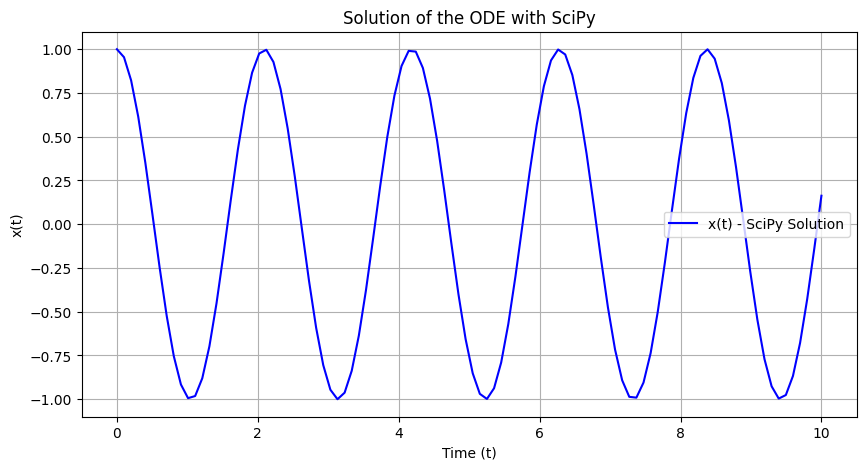

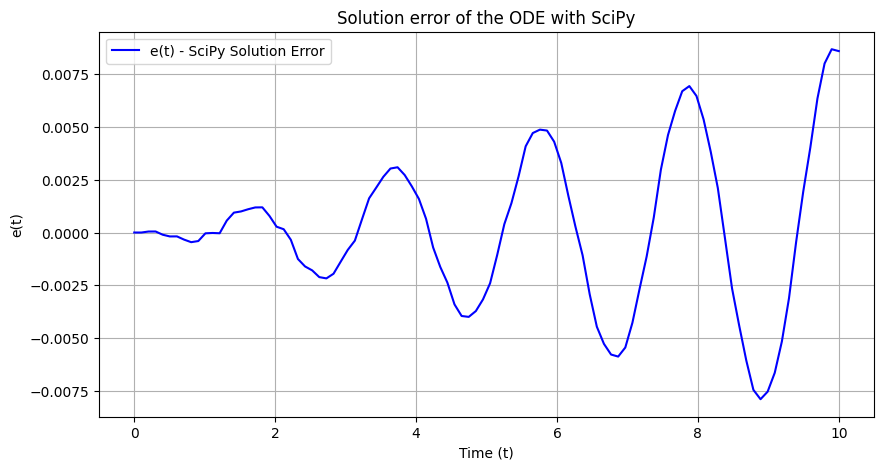

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def system(t, X):
    return [X[1], -9*X[0]]

x0 = [1, 0]

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

solu = solve_ivp(system, t_span, x0, t_eval=t_eval)

plt.figure(figsize=(10, 5))
plt.plot(solu.t, solu.y[0], label='x(t) - SciPy Solution', color='blue')
plt.title('Solution of the ODE with SciPy')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()

z = sm.Function('z')
k = sm.symbols('k')
lhs = sm.Derivative(z(k), k,2) + 9*z(k)
result = sm.dsolve(lhs, ics={z(k).diff(k).subs(k, 0): x0[1], z(k).subs(k, 0): x0[0]})
result

algebraic_solution_func = sm.lambdify(k, result.rhs, 'numpy')
algebraic_solution = algebraic_solution_func(solu.t)

error = solu.y[0] - algebraic_solution
plt.figure(figsize=(10, 5))
plt.plot(solu.t, error, label='e(t) - SciPy Solution Error', color='blue')
plt.title('Solution error of the ODE with SciPy')
plt.xlabel('Time (t)')
plt.ylabel('e(t)')
plt.legend()
plt.grid()
plt.show()

**Simulate 2D system**

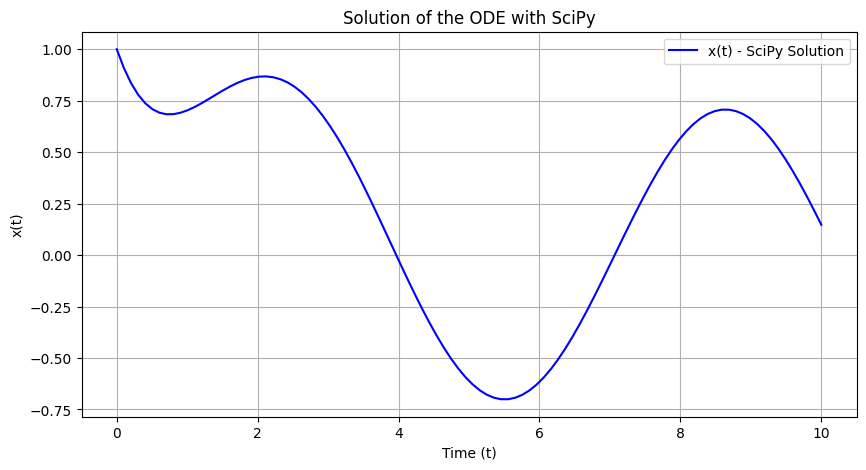

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A = np.array([[-1, 2], 
              [0, 1]])

B = np.array([[1],
              [0]])

def u(t):
    return np.sin(t)

def system(t, X):
    u_t = u(t)
    return A @ X + B.flatten() * u_t

x0 = [1, 0]

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

solu = solve_ivp(system, t_span, x0, t_eval=t_eval)

plt.figure(figsize=(10, 5))
plt.plot(solu.t, solu.y[0], label='x(t) - SciPy Solution', color='blue')
plt.title('Solution of the ODE with SciPy')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()